In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Datasets
%ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Datasets
'=1.2.0'   cwurData.csv   data.csv  'default of credit card clients (1).xlsx'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
import pickle
from matplotlib.colors import ListedColormap

In [ ]:
df=pd.read_excel('default of credit card clients (1).xlsx')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
df['default payment next month'].unique

<bound method Series.unique of 0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64>

In [ ]:
find='default payment next month'
y=df[find]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [ ]:
x=df.drop(find,inplace=False, axis=1)
x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [ ]:
x_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
25662,25663,100000,2,2,1,34,0,0,0,0,...,8022,9733,17284,8540,2010,1149,3094,1003,1004,406
12262,12263,50000,2,2,1,25,1,2,0,0,...,19590,18861,4581,2158,0,1200,477,121,22,0
4141,4142,50000,2,3,1,42,3,2,2,0,...,29577,29529,28276,28768,1000,1000,1000,1000,1000,1000
21653,21654,120000,2,1,2,27,-1,-1,0,0,...,119558,93652,23862,0,23008,100000,3500,1000,0,122350
9946,9947,30000,2,2,2,26,2,2,2,0,...,24705,25202,26608,25926,3100,0,791,1699,0,1000


In [ ]:
x_test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19229,19230,210000,2,2,1,41,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
11439,11440,230000,1,3,2,37,-1,0,0,0,...,41862,21655,64645,44627,1700,10010,5000,64667,5003,3016
16833,16834,10000,1,2,1,45,1,2,2,2,...,8876,10009,7169,8842,1500,0,1500,0,3000,2000
22909,22910,200000,2,2,1,37,0,0,0,0,...,123108,124327,127011,134519,5000,7000,4500,4500,9500,5000
1710,1711,100000,2,1,2,30,0,0,0,0,...,42283,51539,50583,52588,5000,10000,10000,0,2846,1936


In [ ]:
y_train.head()

25662    0
12262    0
4141     0
21653    0
9946     1
Name: default payment next month, dtype: int64

In [ ]:
y_test.head()

19229    0
11439    0
16833    0
22909    0
1710     1
Name: default payment next month, dtype: int64

In [ ]:
f1_arr = []
n_neigh = [i for i in range(2,25)]
for i in range(2,25):
  model=KNeighborsClassifier(n_neighbors=i,algorithm='auto')
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)
  f1_arr.append(f1_score(y_test,y_pred,average='weighted'))
  print("The F1 score obtained when n_neighbours : {} is {}".format(i,f1_score(y_test,y_pred,average='weighted')))

The F1 score obtained when n_neighbours : 2 is 0.7147554574012073
The F1 score obtained when n_neighbours : 3 is 0.7145970161063449
The F1 score obtained when n_neighbours : 4 is 0.7139133403057285
The F1 score obtained when n_neighbours : 5 is 0.715331965264927
The F1 score obtained when n_neighbours : 6 is 0.7129527497040188
The F1 score obtained when n_neighbours : 7 is 0.7196518714818931
The F1 score obtained when n_neighbours : 8 is 0.7148269784773811
The F1 score obtained when n_neighbours : 9 is 0.7223223026126369
The F1 score obtained when n_neighbours : 10 is 0.7189040458841748
The F1 score obtained when n_neighbours : 11 is 0.7226223464212288
The F1 score obtained when n_neighbours : 12 is 0.7212784588150118
The F1 score obtained when n_neighbours : 13 is 0.7240786566638964
The F1 score obtained when n_neighbours : 14 is 0.7174007868748512
The F1 score obtained when n_neighbours : 15 is 0.720398644571487
The F1 score obtained when n_neighbours : 16 is 0.7152397226822563
The F

In [ ]:
model.score(x_test, y_test)

0.7842666666666667

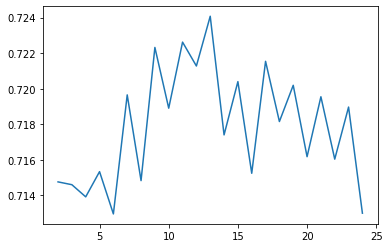

In [ ]:
plt.plot(n_neigh, f1_arr)

In [1]:
plt.plot(y_train, y_test)

NameError: ignored

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
plotX=[df['SEX'],df['EDUCATION']]
print(plotX)

[0        2
1        2
2        2
3        2
4        1
        ..
29995    1
29996    1
29997    1
29998    1
29999    1
Name: SEX, Length: 30000, dtype: int64, 0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: EDUCATION, Length: 30000, dtype: int64]


In [ ]:
svm_clf=LinearSVC()
# svm_clf=LinearSVC(multi_class='crammer_singer')
svm_clf.fit(x_train, y_train)
y_pred=svm_clf.predict(x_test)
svm_clf_F1=f1_score(y_test,y_pred,average='weighted')
print("SVM Classifier F1 Score is ",svm_clf_F1,"\n")

SVM Classifier F1 Score is  0.6927363184079601 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
svm_clf.score(x_test,y_test)

0.7866666666666666

In [ ]:
import pickle
sm=pickle.dumps(svm_clf)
svm2=pickle.loads(sm)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gn=GaussianNB()
gn.fit(x_train,y_train)
y_pred=gn.predict(x_test)
gn_f1=f1_score(y_test,y_pred,average='weighted')
print(gn_f1)

0.38044125375799354
